In [1]:
!pip3 install pytrends
!pip3 install pyupbit
!pip3 install pyjwt
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# connect to google 

from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360) 

# build payload

kw_list = ["bitcoin"] # list of keywords to get data 

pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m') 

#1 Interest over Time
google_trend_df = pytrends.interest_over_time() 
google_trend_df = google_trend_df.reset_index() 

google_trend_df = google_trend_df.drop(['isPartial'], axis =1 , inplace = False)
google_trend_df.columns = ['date','interest']
google_trend_df['date'] = google_trend_df.date.dt.date
import plotly.express as px

fig = px.line(google_trend_df, x="date", y=['interest'], title='Keyword Web Search Interest Over Time')
fig.show() 

# pytrends.get_historical_interest(kw_list, year_start=2021, month_start=9, day_start=1, hour_start=0, year_end=2021, mon

In [3]:
print(google_trend_df)

          date  interest
0   2021-12-05        60
1   2021-12-12        52
2   2021-12-19        48
3   2021-12-26        48
4   2022-01-02        62
5   2022-01-09        56
6   2022-01-16        60
7   2022-01-23        74
8   2022-01-30        57
9   2022-02-06        54
10  2022-02-13        44
11  2022-02-20        59
12  2022-02-27        54
13  2022-03-06        48
14  2022-03-13        41
15  2022-03-20        40
16  2022-03-27        45
17  2022-04-03        39
18  2022-04-10        36
19  2022-04-17        33
20  2022-04-24        33
21  2022-05-01        36
22  2022-05-08        81
23  2022-05-15        53
24  2022-05-22        45
25  2022-05-29        37
26  2022-06-05        38
27  2022-06-12       100
28  2022-06-19        77
29  2022-06-26        54
30  2022-07-03        49
31  2022-07-10        43
32  2022-07-17        46
33  2022-07-24        38
34  2022-07-31        36
35  2022-08-07        35
36  2022-08-14        34
37  2022-08-21        32
38  2022-08-28        33


In [4]:
from pytrends.request import TrendReq
from pytrends import dailydata
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pyupbit
import tensorflow as tf
import numpy as np
import math

upbit_df = pyupbit.get_ohlcv(ticker="KRW-BTC", interval="day", count=365, period=1)
upbit_df.reset_index(inplace=True)
upbit_df.rename(columns = {'index':'date'}, inplace=True)
upbit_df['date'] = upbit_df.date.dt.date
print(upbit_df)

           date        open        high         low       close        volume  \
0    2021-12-01  70771000.0  72850000.0  70500000.0  70936000.0   7443.529638   
1    2021-12-02  70936000.0  71500000.0  69958000.0  70539000.0  10208.003133   
2    2021-12-03  70563000.0  71189000.0  67034000.0  68053000.0  15061.777544   
3    2021-12-04  68068000.0  68191000.0  56000000.0  62206000.0  28348.959143   
4    2021-12-05  62178000.0  63297000.0  59685000.0  61877000.0  12124.693941   
..          ...         ...         ...         ...         ...           ...   
360  2022-11-26  22677000.0  22862000.0  22605000.0  22660000.0   2148.775806   
361  2022-11-27  22646000.0  22774000.0  22605000.0  22646000.0   1989.051138   
362  2022-11-28  22661000.0  22690000.0  22217000.0  22339000.0   3579.090571   
363  2022-11-29  22329000.0  22617000.0  22155000.0  22417000.0   2523.908210   
364  2022-11-30  22417000.0  23113000.0  22415000.0  22879000.0   2607.474296   

            value  
0    5.

In [5]:
news_df = pd.read_csv("./news_count.csv")
print(str(news_df.date))
news_df['date'] = news_df['date'].apply(lambda  _: str(_))
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['date'] = news_df.date.dt.date
print(news_df)

0      20211130
1      20211201
2      20211202
3      20211203
4      20211204
         ...   
361    20221126
362    20221127
363    20221128
364    20221129
365    20221130
Name: date, Length: 366, dtype: int64
           date  count
0    2021-11-30     56
1    2021-12-01     26
2    2021-12-02     27
3    2021-12-03     16
4    2021-12-04     13
..          ...    ...
361  2022-11-26      2
362  2022-11-27      4
363  2022-11-28     21
364  2022-11-29     29
365  2022-11-30     12

[366 rows x 2 columns]


In [14]:
total_df = pd.merge(upbit_df, news_df, how = 'outer', on = 'date')
# total_df = pd.merge(total_df,google_trend_df, how = 'outer', on = 'date')
print(total_df)
print(total_df.dtypes)

           date        open        high         low       close        volume  \
0    2021-12-01  70771000.0  72850000.0  70500000.0  70936000.0   7443.529638   
1    2021-12-02  70936000.0  71500000.0  69958000.0  70539000.0  10208.003133   
2    2021-12-03  70563000.0  71189000.0  67034000.0  68053000.0  15061.777544   
3    2021-12-04  68068000.0  68191000.0  56000000.0  62206000.0  28348.959143   
4    2021-12-05  62178000.0  63297000.0  59685000.0  61877000.0  12124.693941   
..          ...         ...         ...         ...         ...           ...   
361  2022-11-27  22646000.0  22774000.0  22605000.0  22646000.0   1989.051138   
362  2022-11-28  22661000.0  22690000.0  22217000.0  22339000.0   3579.090571   
363  2022-11-29  22329000.0  22617000.0  22155000.0  22417000.0   2523.908210   
364  2022-11-30  22417000.0  23113000.0  22415000.0  22879000.0   2607.474296   
365  2021-11-30         NaN         NaN         NaN         NaN           NaN   

            value  count  


In [8]:
# total_df = pd.merge(total_df, google_trend_df, how='outer', on='date')
# print(total_df)

           date        open        high         low       close        volume  \
0    2021-12-01  70771000.0  72850000.0  70500000.0  70936000.0   7443.529638   
1    2021-12-02  70936000.0  71500000.0  69958000.0  70539000.0  10208.003133   
2    2021-12-03  70563000.0  71189000.0  67034000.0  68053000.0  15061.777544   
3    2021-12-04  68068000.0  68191000.0  56000000.0  62206000.0  28348.959143   
4    2021-12-05  62178000.0  63297000.0  59685000.0  61877000.0  12124.693941   
..          ...         ...         ...         ...         ...           ...   
361  2022-11-27  22646000.0  22774000.0  22605000.0  22646000.0   1989.051138   
362  2022-11-28  22661000.0  22690000.0  22217000.0  22339000.0   3579.090571   
363  2022-11-29  22329000.0  22617000.0  22155000.0  22417000.0   2523.908210   
364  2022-11-30  22417000.0  23113000.0  22415000.0  22879000.0   2607.474296   
365  2021-11-30         NaN         NaN         NaN         NaN           NaN   

            value  count  i

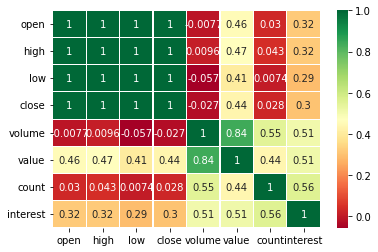

In [12]:
import seaborn as sns

sns.heatmap(total_df.corr(),linewidths=0.1, cmap='RdYlGn', linecolor='white', annot=True)

In [18]:
# total_df['interest'].isnull().sum()
print(total_df['count'])

0      26
1      27
2      16
3      13
4      28
       ..
361     4
362    21
363    29
364    12
365    56
Name: count, Length: 366, dtype: int64


In [33]:
def makeX(df, i):
    tempX = []
    tempX.append(df['open'].iloc[i])
    tempX.append(df['high'].iloc[i])
    tempX.append(df['low'].iloc[i])
    tempX.append(df['close'].iloc[i])
    tempX.append(df['volume'].iloc[i])
    tempX.append(df['count'].iloc[i])
    return tempX

def scaleDown(df, name, i):
    return round(df[name].iloc[i]/math.pow(10,len(str(int(df[name].iloc[i])))),3)

def makeY(df, i):
    gap = df['close'].iloc[i+1] - df['close'].iloc[i]
    tempY = 1 if gap > 0 else 0
    return tempY

x = []
y = []


#인풋 데이터 5개 이므로 shape=(6,)를 대입
inputs = tf.keras.Input(shape=(6,))

# h1 ~ h3은 히든 레이어, 층이 깊을 수록 정확도가 높아질 수 있음
# relu, tanh는 활성화 함수의 종류
h1 = tf.keras.layers.Dense(128, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(128, activation='tanh')(h1)
h3 = tf.keras.layers.Dense(128, activation='relu')(h2)

# 값을 0 ~ 1 사이로 표현할 경우 sigmoid 활성화 함수 활용
# 마지막 아웃풋 값은 1개여야 함
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(h3)

# 인풋, 아웃풋 설정을 대입하여 모델 생성 
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])

# 인풋/아웃풋 데이터 생성
for i in range(len(total_df)):
    if i < len(total_df)-2:
        x.append(makeX(total_df, i))
        y.append(makeY(total_df, i))

# 인풋, 아웃풋 데이터를 numpy 포맷으로 대입
# epochs는 학습 반복 횟수
fitInfo = model.fit(np.array(x), np.array(y), epochs=2000)

result = {'accuracy': round(fitInfo.history['acc'][-1],2),
          'predict': round(model.predict([makeX(total_df, -2)])[0][0],2)}

print(result)

Epoch 1/2000
12/12 [==============================] - 2s 10ms/step - loss: 0.7328 - acc: 0.4808
Epoch 2/2000
12/12 [==============================] - 0s 7ms/step - loss: 0.7099 - acc: 0.5275
Epoch 3/2000
12/12 [==============================] - 0s 7ms/step - loss: 0.6989 - acc: 0.5302
Epoch 4/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.7009 - acc: 0.4698
Epoch 5/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.7008 - acc: 0.4835
Epoch 6/2000
12/12 [==============================] - 0s 7ms/step - loss: 0.7009 - acc: 0.4835
Epoch 7/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.6917 - acc: 0.5495
Epoch 8/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.7029 - acc: 0.5055
Epoch 9/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.7110 - acc: 0.4808
Epoch 10/2000
12/12 [==============================] - 0s 9ms/step - loss: 0.6976 - acc: 0.4643
Epoch 11/2000
12/12 [===========================

KeyboardInterrupt: ignored

dict_keys(['loss', 'acc'])


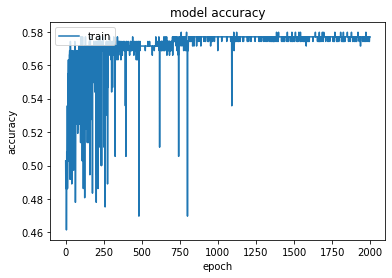

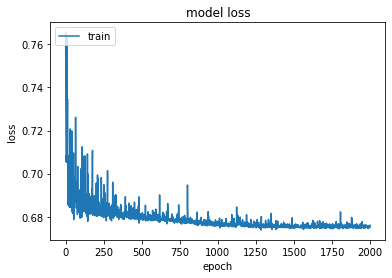

In [35]:
import matplotlib.pyplot as plt
results = fitInfo

print(fitInfo.history.keys())
# summarize history for accuracy
plt.plot(results.history['acc'])
# plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
# plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

y_target = total_df['close']
X_data = total_df.drop(['date'], axis=1,inplace=False)

lr_reg = LinearRegression()
svr_reg = SVR()
ada_reg = AdaBoostRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target,
  scoring="neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('##### ',model.__class__.__name__ , ' #####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

models = [lr_reg, svr_reg,ada_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)